In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

In [3]:
filename = f"data/evaluation_franke.csv"
df = pd.read_csv(filename)
method = "wild"
df_defect = df[df.method == method+"_defected_data"]
df_typical = df[df.method == method+"_typical_data"]


FNR = len(df_defect[df_defect.rejected==False])/len(df_defect)
FPR = len(df_typical[df_typical.rejected==True])/len(df_typical)
 
print(f"False Negative Rate {FNR} (type II error) based on {len(df_defect)} runs")
print(f"False Positive Rate {FPR} (type I error) based on {len(df_typical)} runs")


False Negative Rate 0.055 (type II error) based on 1000 runs
False Positive Rate 0.1 (type I error) based on 1000 runs


In [11]:
filename = f"data/evaluation_franke.csv"
df = pd.read_csv(filename)

In [12]:
df
df[['bootstrap','noise', 'defected']] = df['method'].str.split('_', n=2, expand=True)
df

,rejected,method,bootstrap,noise,defected
0,True,wild_gauss_defected_data,wild,gauss,defected_data
1,True,wild_gauss_defected_data,wild,gauss,defected_data
2,True,wild_gauss_defected_data,wild,gauss,defected_data
3,True,wild_gauss_defected_data,wild,gauss,defected_data
4,True,wild_gauss_defected_data,wild,gauss,defected_data
...,...,...,...,...,...
11995,False,wild_laplace_typical_data,wild,laplace,typical_data
11996,False,wild_laplace_typical_data,wild,laplace,typical_data
11997,False,wild_laplace_typical_data,wild,laplace,typical_data
11998,False,wild_laplace_typical_data,wild,laplace,typical_data


In [15]:
df_summary = df.groupby(["bootstrap", "noise", "defected"])["rejected"].agg(["count", "sum"])
df_summary["rate"] = df_summary["sum"]/df_summary["count"]
df_summary

count   sum   rate
bootstrap noise   defected                         
normal    gauss   defected_data   1000   956  0.956
                  typical_data    1000   145  0.145
          laplace defected_data   1000  1000  1.000
                  typical_data    1000   135  0.135
          skewed  defected_data   1000  1000  1.000
                  typical_data    1000   127  0.127
wild      gauss   defected_data   1000   945  0.945
                  typical_data    1000   141  0.141
          laplace defected_data   1000  1000  1.000
                  typical_data    1000   134  0.134
          skewed  defected_data   1000  1000  1.000
                  typical_data    1000   135  0.135

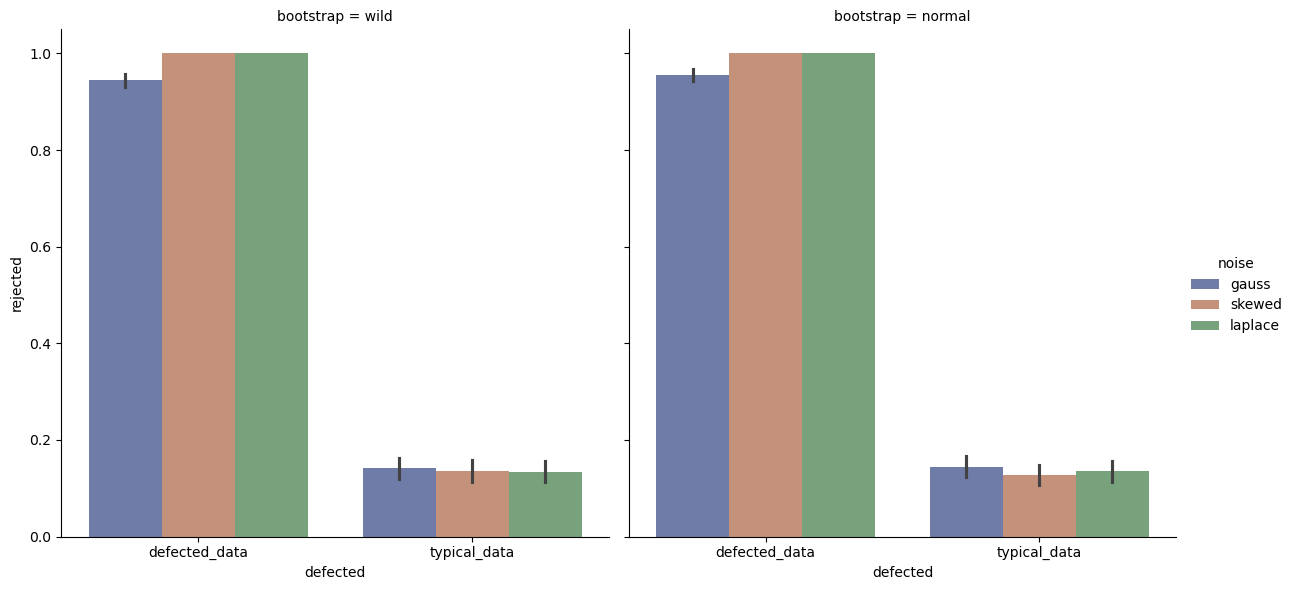

In [14]:
sns.catplot(
    data=df, kind="bar",
    x="defected", y="rejected", hue="noise", col="bootstrap",
    palette="dark", alpha=.6, height=6
)